In [27]:

import matplotlib.pyplot as plt
import pandas as pd
import torch

from tsfm_public import (
    TimeSeriesForecastingPipeline,
    TinyTimeMixerForPrediction,
)
from tsfm_public.toolkit.visualization import plot_predictions

In [28]:
context_df = pd.read_csv("telemetry_anonymized.csv", parse_dates=["Last Seen"])
context_df.head()

,Event Id,host_name (anonymized),model_name,hardware_make,Last Seen,auth_username (anonymized),group_id,tenant_id,platform,metric_category,...,p90_battery_temperature,avg_cpu_temp,p90_cpu_temp,avg_battery_discharge,p90_battery_discharge,avg_boot_time,p90_boot_time,uptime_days,total_app_crash,Status
0,e90b28df-1903-452b-bfc9-cbd429e4f865,3815,HP EliteBook 840 14 inch G11 Notebook PC,HP,2025-07-10 11:29:16+00:00,4681.0,windows-production,client-engineering,Windows,Resource,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,58b8db46-bb0e-433a-9083-97909ecedc06,1611,HP EliteBook 840 14 inch G11 Notebook PC,HP,2025-07-10 07:01:03+00:00,9031.0,windows-production,client-engineering,Windows,Resource,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,9984,HP ProDesk 600 G3 DM,HP,2025-07-02 22:40:11+00:00,6529.0,windows-production,client-engineering,Windows,Resource,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0bb3aa64-dcce-4b13-b636-0cd88b13ffe9,3290,HP ZBook Studio 16 inch G9 Mobile Workstation PC,HP,2025-07-10 12:57:17+00:00,9883.0,windows-production,client-engineering,Windows,Resource,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,924c02cc-c28a-450b-bd94-1b30c39569fc,1025,HP EliteBook 840 14 inch G11 Notebook PC,HP,2025-07-10 12:52:33+00:00,1651.0,windows-production,client-engineering,Windows,Resource,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [29]:
timestamp_column = "Last Seen"
context_df[timestamp_column] = context_df[timestamp_column].dt.tz_localize(None)
target_column = ["Status"]
context_length = 1000

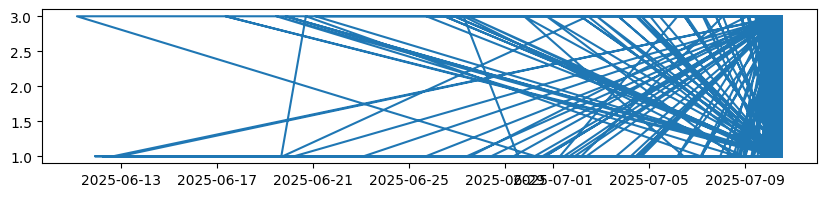

In [30]:

fig, axs = plt.subplots(len(target_column), 1, figsize=(10, 2 * len(target_column)), squeeze=False)
for ax, target_column in zip(axs, target_column):
    ax[0].plot(context_df[timestamp_column], context_df[target_column])

In [38]:
target_column = "Status"
context_df = context_df.sort_values(timestamp_column)


zeroshot_model = TinyTimeMixerForPrediction.from_pretrained(
    "ibm-granite/granite-timeseries-ttm-r2",  # Name of the model on Hugging Face
    num_input_channels=len(target_column),  # tsp.num_input_channels
)

In [ ]:
# Create a pipeline.
device = "cuda" if torch.cuda.is_available() else "cpu"

pipeline = TimeSeriesForecastingPipeline(
    zeroshot_model,
    timestamp_column=timestamp_column,
    id_columns=["Event Id"],
    target_column=target_column,
    explode_forecasts=False,
    freq="h"
)

# Make a forecast on the target column given the input data.
zeroshot_forecast = pipeline(context_df)
zeroshot_forecast.tail()

Device set to use cpu


ValueError: Could not extend time series because frequency was not provided and could not be estimated from the available data.